In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Loading the vanguard customer database and sample scenario from .txt files

van_cust_sample = pd.read_csv('df_final_experiment_clients.txt')
van_cust_base = pd.read_csv('df_final_demo.txt')

In [5]:
van_cust_base.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [6]:
van_cust_base

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
#calculate column tenure in years with decimals
van_cust_base['clnt_tenure_years']=(van_cust_base['clnt_tenure_mnth']/12).round(2)

In [8]:
#drop columns clnt_tenure_yr & clnt_tenure_mnth
van_cust_base=van_cust_base.drop('clnt_tenure_yr',axis=1)
van_cust_base=van_cust_base.drop('clnt_tenure_mnth',axis=1)

In [9]:
#create column with average balance per account
van_cust_base['avg_bal_per_account']=(van_cust_base['bal']/van_cust_base['num_accts']).round(2)

In [10]:
#identifying and droping rows containing null vales
nan_rows = van_cust_base[van_cust_base.isna().any(axis=1)]
van_cust_base=van_cust_base.dropna()
van_cust_base.shape


(70594, 9)

In [11]:
# Replace X with U in the gender' column
van_cust_base['gendr'] = van_cust_base['gendr'].replace('X', 'U')

In [12]:
#cast to integers columns clnt_age, num_accts, calls_6_mnth, logons_6_mnth
van_cust_base['clnt_age']=van_cust_base['clnt_age'].astype(int)
van_cust_base['calls_6_mnth']=van_cust_base['calls_6_mnth'].astype(int)
van_cust_base['logons_6_mnth']=van_cust_base['logons_6_mnth'].astype(int)
van_cust_base['num_accts']=van_cust_base['num_accts'].astype(int)
van_cust_base.dtypes

client_id                int64
clnt_age                 int32
gendr                   object
num_accts                int32
bal                    float64
calls_6_mnth             int32
logons_6_mnth            int32
clnt_tenure_years      float64
avg_bal_per_account    float64
dtype: object

In [13]:
#merge df(van_cust_base) with (van_cust_sample) on client_id to obtain info "variation" rename variation
van_cust_all = pd.merge(van_cust_base, van_cust_sample, on='client_id', how='inner')
van_cust_all=van_cust_all.rename(columns={'Variation':'variation'})
van_cust_all

,client_id,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_years,avg_bal_per_account,variation
0,836976,60,U,2,45105.30,6,9,6.08,22552.65,Test
1,2304905,58,U,2,110860.30,6,9,7.83,55430.15,Control
2,1439522,32,U,2,52467.79,6,9,5.33,26233.89,Test
3,1562045,49,M,2,67454.65,3,6,16.50,33727.32,Test
4,5126305,33,F,2,103671.75,0,3,12.08,51835.88,Control
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,38,U,3,1411062.68,5,5,4.67,470354.23,NaN
70590,8981690,31,M,2,101867.07,6,6,12.33,50933.54,NaN
70591,333913,61,F,2,40745.00,3,3,16.50,20372.50,NaN
70592,1573142,68,M,3,475114.69,4,4,21.25,158371.56,NaN


In [14]:
#create bins for age

bins = [0, 30, 40, 50, 60, float('inf')]  # Define the bins for age ranges
labels = ['<30 years', '30 to 40', '40 to 50', '50 to 60', '>60']  # Corresponding labels

# Add the new column 'age_range'
van_cust_all['age_range'] = pd.cut(van_cust_all['clnt_age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
van_cust_all.head(20)  # This will show the first few rows with the new column

,client_id,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_years,avg_bal_per_account,variation,age_range
0,836976,60,U,2,45105.30,6,9,6.08,22552.65,Test,>60
1,2304905,58,U,2,110860.30,6,9,7.83,55430.15,Control,50 to 60
2,1439522,32,U,2,52467.79,6,9,5.33,26233.89,Test,30 to 40
3,1562045,49,M,2,67454.65,3,6,16.50,33727.32,Test,40 to 50
4,5126305,33,F,2,103671.75,0,3,12.08,51835.88,Control,30 to 40
5,3727881,30,U,2,23915.60,0,3,5.92,11957.80,Control,30 to 40
6,272934,58,U,2,27021.42,2,5,5.50,13510.71,Control,50 to 60
7,388801,57,M,5,522498.72,1,4,30.08,104499.74,Test,50 to 60
8,285619,67,M,2,299388.72,3,6,30.75,149694.36,Control,>60
9,8198645,54,F,2,382303.83,6,9,15.75,191151.92,Test,50 to 60


In [15]:
#create bins for tenure

bins = [0, 1, 5, 10, 20, float('inf')]  # Define the bins for tenure ranges
labels = ['<1 year', '1 to 5', '5 to 10', '10 to 20', '>20']  # Corresponding labels

# Add the new column 'age_range'
van_cust_all['tenure_range'] = pd.cut(van_cust_all['clnt_tenure_years'], bins=bins, labels=labels, right=False)


van_cust_all.head(20)

,client_id,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,clnt_tenure_years,avg_bal_per_account,variation,age_range,tenure_range
0,836976,60,U,2,45105.30,6,9,6.08,22552.65,Test,>60,5 to 10
1,2304905,58,U,2,110860.30,6,9,7.83,55430.15,Control,50 to 60,5 to 10
2,1439522,32,U,2,52467.79,6,9,5.33,26233.89,Test,30 to 40,5 to 10
3,1562045,49,M,2,67454.65,3,6,16.50,33727.32,Test,40 to 50,10 to 20
4,5126305,33,F,2,103671.75,0,3,12.08,51835.88,Control,30 to 40,10 to 20
5,3727881,30,U,2,23915.60,0,3,5.92,11957.80,Control,30 to 40,5 to 10
6,272934,58,U,2,27021.42,2,5,5.50,13510.71,Control,50 to 60,5 to 10
7,388801,57,M,5,522498.72,1,4,30.08,104499.74,Test,50 to 60,>20
8,285619,67,M,2,299388.72,3,6,30.75,149694.36,Control,>60,>20
9,8198645,54,F,2,382303.83,6,9,15.75,191151.92,Test,50 to 60,10 to 20


In [16]:
#create two df from van_cust_all based on variation
van_cust_test=van_cust_all[van_cust_all['variation']=='Test']
van_cust_control=van_cust_all[van_cust_all['variation']=='Control']

In [17]:
#creating variables to store the #of K cutomers in test, control and all population
num_cust_test=(van_cust_test['client_id'].count()/1000).round(1)
num_cust_control=(van_cust_control['client_id'].count()/1000).round(1)
num_cust_all=(van_cust_all['client_id'].count()/1000).round(1)

In [18]:
num_cust_test

27.0

In [19]:
num_cust_control

23.5

In [20]:
num_cust_all

70.6

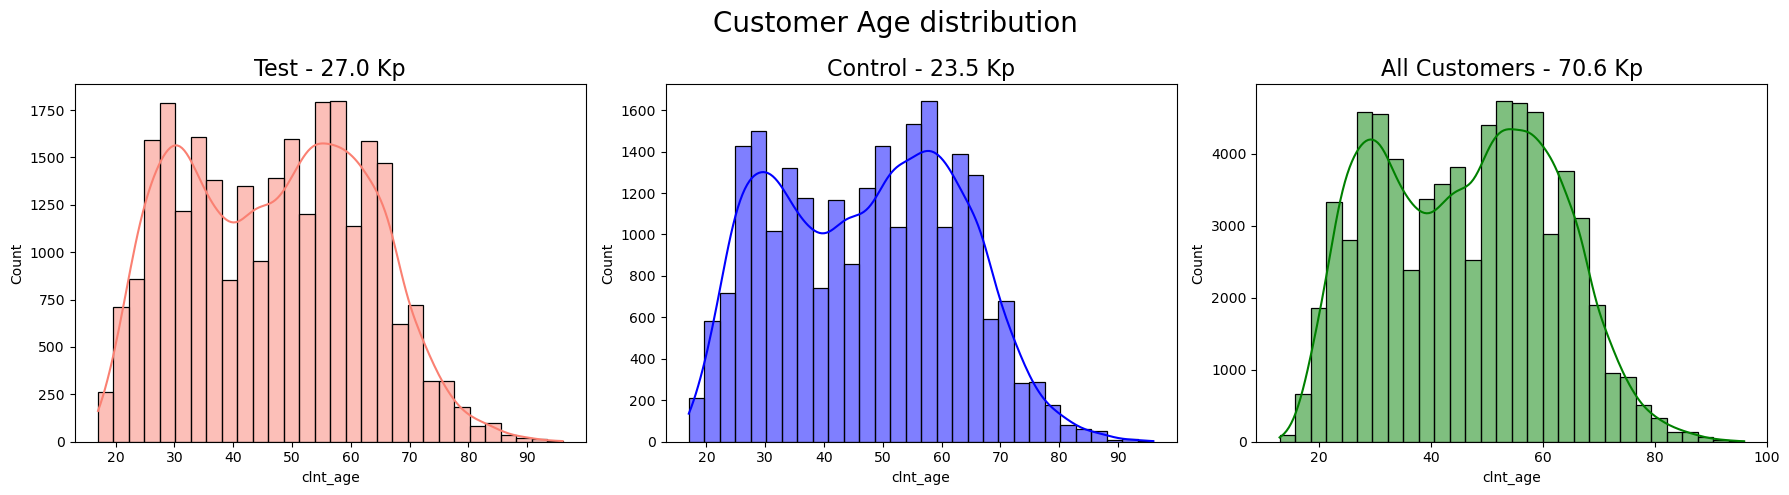

In [21]:
#histograms for age of 3 populations

# Create a figure with 1 row and 3 columns for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the size as needed

# First plot (Test)
sns.histplot(van_cust_test['clnt_age'], kde=True, bins=30, color="salmon", ax=axes[0])
axes[0].set_title(f'Test - {num_cust_test} Kp',fontsize=16)

# Second plot (Control)
sns.histplot(van_cust_control['clnt_age'], kde=True, bins=30, color="blue", ax=axes[1])
axes[1].set_title(f'Control - {num_cust_control} Kp',fontsize=16)

# Third plot (All customers)
sns.histplot(van_cust_all['clnt_age'], kde=True, bins=30, color="green", ax=axes[2])
axes[2].set_title(f'All Customers - {num_cust_all} Kp',fontsize=16)

# Add a common title for the entire figure
fig.suptitle('Customer Age distribution', fontsize=20)

# Show the plot
plt.tight_layout()  # Ensures plots don't overlap
plt.show()

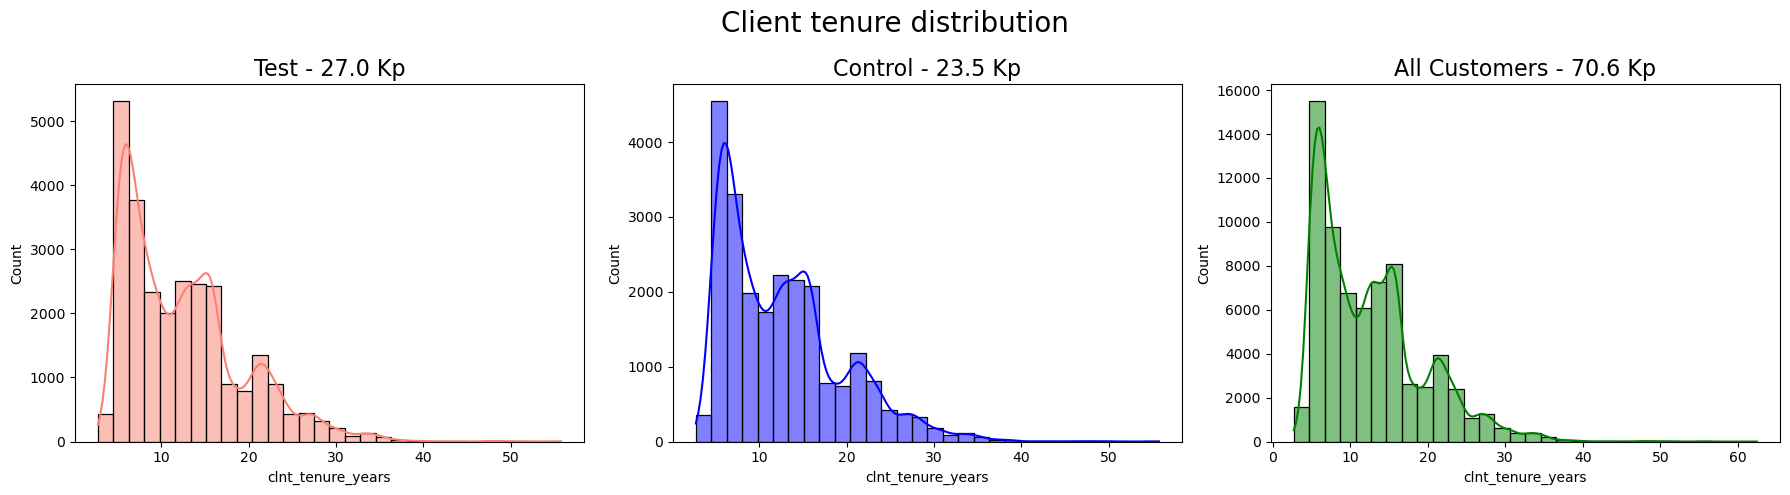

In [22]:
#histograms for tenure of 3 populations

# Create a figure with 1 row and 3 columns for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the size as needed

# First plot (Test)
sns.histplot(van_cust_test['clnt_tenure_years'], kde=True, bins=30, color="salmon", ax=axes[0])
axes[0].set_title(f'Test - {num_cust_test} Kp',fontsize=16)

# Second plot (Control)
sns.histplot(van_cust_control['clnt_tenure_years'], kde=True, bins=30, color="blue", ax=axes[1])
axes[1].set_title(f'Control - {num_cust_control} Kp',fontsize=16)

# Third plot (All customers)
sns.histplot(van_cust_all['clnt_tenure_years'], kde=True, bins=30, color="green", ax=axes[2])
axes[2].set_title(f'All Customers - {num_cust_all} Kp',fontsize=16)

# Add a common title for the entire figure
fig.suptitle('Client tenure distribution', fontsize=20)

# Show the plot
plt.tight_layout()  # Ensures plots don't overlap
plt.show()

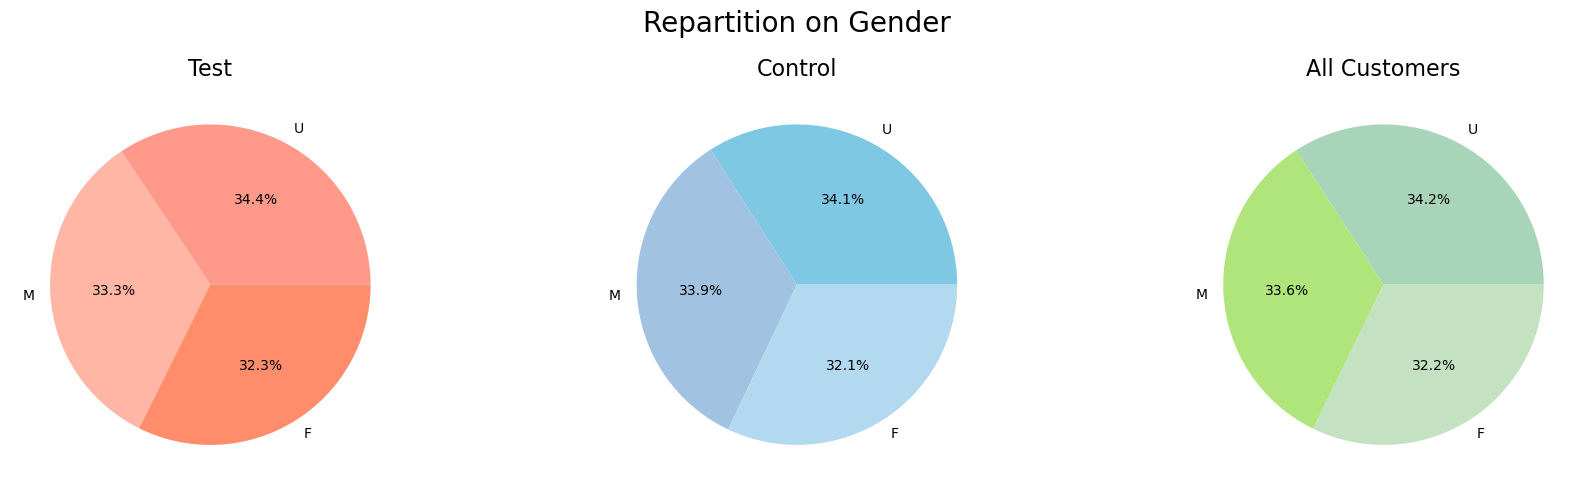

In [23]:
#pie charts for gender of 3 populations

# Gender distribution for each sample (Test, Control, All)
gendr_test_counts = van_cust_test['gendr'].value_counts()
gendr_control_counts = van_cust_control['gendr'].value_counts()
gendr_all_counts = van_cust_all['gendr'].value_counts()

# Create a figure with 1 row and 3 columns for side-by-side pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the size as needed

# Pie chart for 'Test'
axes[0].pie(gendr_test_counts, labels=gendr_test_counts.index, autopct='%1.1f%%', colors=['#FF9A8B', '#FFB6A4', '#FF8C6A'])
axes[0].set_title('Test',fontsize=16)

# Pie chart for 'Control'
axes[1].pie(gendr_control_counts, labels=gendr_control_counts.index, autopct='%1.1f%%', colors=['#7EC8E3', '#A2C2E2','#B3D9F1'])
axes[1].set_title('Control',fontsize=16)

# Pie chart for 'All'
axes[2].pie(gendr_all_counts, labels=gendr_all_counts.index, autopct='%1.1f%%', colors=['#A8D5BA', '#B0E57C','#C4E1C1'])
axes[2].set_title('All Customers',fontsize=16)

# Add a common title for the entire figure
fig.suptitle('Repartition on Gender', fontsize=20)

# Show the plot
plt.tight_layout()  # Ensures plots don't overlap
plt.show()

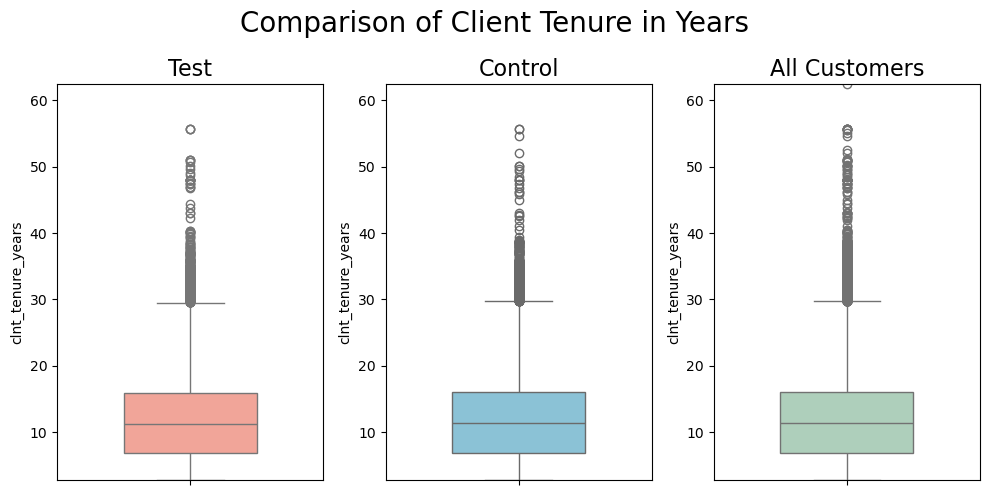

In [24]:
#boxplots for account tenure of 3 populations

# Create a figure with 1 row and 3 columns for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust the size as needed

# Determine the common y-axis limits based on the combined data
y_min = min(van_cust_test['clnt_tenure_years'].min(), van_cust_control['clnt_tenure_years'].min(), van_cust_all['clnt_tenure_years'].min())
y_max = max(van_cust_test['clnt_tenure_years'].max(), van_cust_control['clnt_tenure_years'].max(), van_cust_all['clnt_tenure_years'].max())

# First plot (Test)
sns.boxplot(data=van_cust_test['clnt_tenure_years'], color="#FF9A8B", ax=axes[0],width=0.5)
axes[0].set_title('Test',fontsize=16)
axes[0].set_ylim(y_min, y_max)  # Set common y-axis limits

# Second plot (Control)
sns.boxplot(data=van_cust_control['clnt_tenure_years'], color="#7EC8E3", ax=axes[1], width=0.5)
axes[0].set_title('Test', fontsize=16)
axes[1].set_title('Control',fontsize=16)
axes[1].set_ylim(y_min, y_max)  # Set common y-axis limits

# Third plot (All customers)
sns.boxplot(data=van_cust_all['clnt_tenure_years'], color="#A8D5BA", ax=axes[2],width=0.5)
axes[2].set_title('All Customers',fontsize=16)
axes[2].set_ylim(y_min, y_max)  # Set common y-axis limits

# Add a common title for the entire figure
fig.suptitle('Comparison of Client Tenure in Years', fontsize=20)

# Show the plot
plt.tight_layout()  # Ensures plots don't overlap
plt.show()

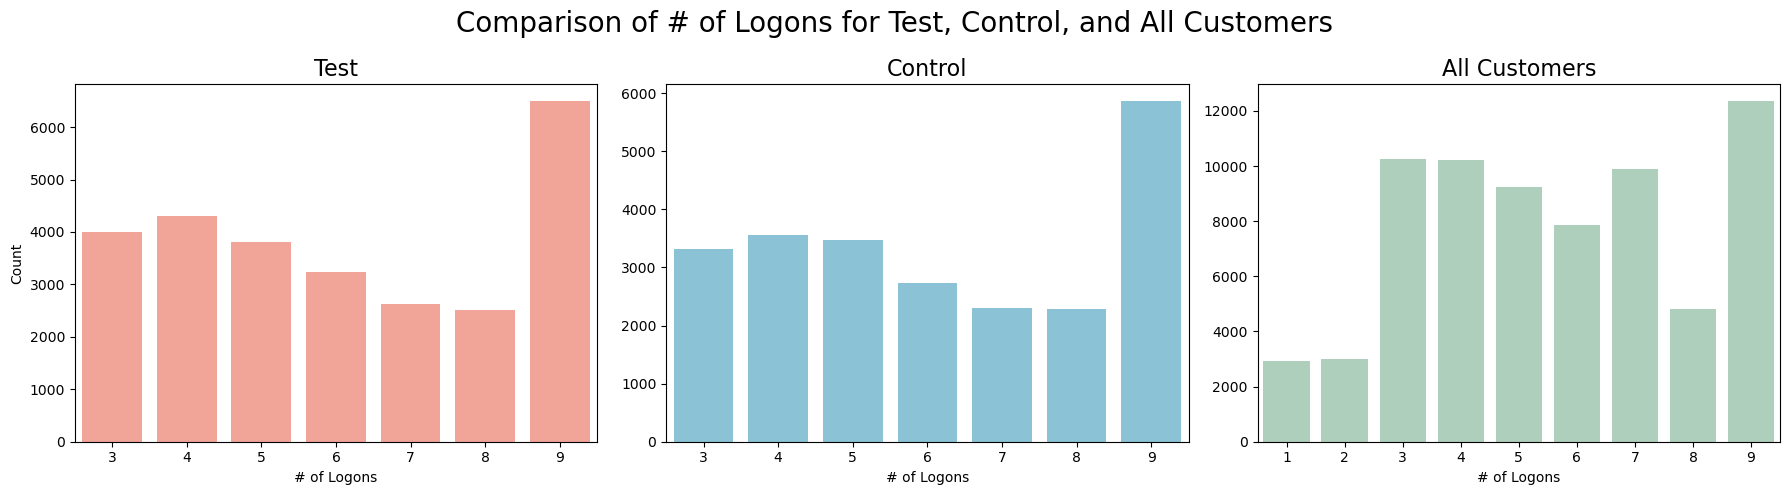

In [24]:
# barchart for #of logons
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the size as needed

# First bar chart (Test population)
sns.barplot(x=van_cust_test['logons_6_mnth'].value_counts().index, 
            y=van_cust_test['logons_6_mnth'].value_counts().values, 
            color="#FF9A8B", ax=axes[0])
axes[0].set_title('Test', fontsize=16)
axes[0].set_xlabel('# of Logons')
axes[0].set_ylabel('Count')

# Second bar chart (Control population)
sns.barplot(x=van_cust_control['logons_6_mnth'].value_counts().index, 
            y=van_cust_control['logons_6_mnth'].value_counts().values, 
            color="#7EC8E3", ax=axes[1])
axes[1].set_title('Control', fontsize=16)
axes[1].set_xlabel('# of Logons')
axes[1].set_ylabel('')

# Third bar chart (All customers)
sns.barplot(x=van_cust_all['logons_6_mnth'].value_counts().index, 
            y=van_cust_all['logons_6_mnth'].value_counts().values, 
            color="#A8D5BA", ax=axes[2])
axes[2].set_title('All Customers', fontsize=16)
axes[2].set_xlabel('# of Logons')
axes[2].set_ylabel('')

# Add a common title for the entire figure
fig.suptitle('Comparison of # of Logons for Test, Control, and All Customers', fontsize=20)

# Show the plot
plt.tight_layout()  # Ensures plots don't overlap
plt.show()

In [25]:
# Function to compute summary statistics for selected numerical variables
def summary_statistics(df, selected_columns, balance_column='bal'):
    # Filter only the selected columns
    df_selected = df[selected_columns].copy()  # Create a copy to avoid SettingWithCopyWarning
    
    # To display balance in K$, divide the balance column by 1000 (convert to K$)
    # Only apply conversion to balance if it is in selected_columns
    if balance_column in selected_columns:
        df_selected.loc[:, balance_column] = df_selected[balance_column] / 1000  # Convert balance to K$
    
    # Calculate the required statistics for the selected numerical columns
    summary = pd.DataFrame({
        'Mean': df_selected.mean(),
        'Mode': df_selected.mode().iloc[0],  # Get the first mode if there are multiple
        'Median': df_selected.median(),
        'Std Dev': df_selected.std(),
        'Min' : df_selected.min(),
        'Max': df_selected.max()
    })
    
    return summary

# Manually specify the numerical variables you want to analyze
selected_columns = ['clnt_age', 'num_accts','clnt_tenure_years','calls_6_mnth','logons_6_mnth']

# Apply the function to the Test, Control, and All DataFrames
test_summary = summary_statistics(van_cust_test, selected_columns)
control_summary = summary_statistics(van_cust_control, selected_columns)
all_summary = summary_statistics(van_cust_all, selected_columns)  # 'all_df' is the pre-existing All DataFrame

# Combine the summaries into one DataFrame, using a MultiIndex to manage columns
summary_df = pd.concat([test_summary, control_summary, all_summary], axis=1)

# Rename the columns with 'Test', 'Control', and 'All' (with multi-level index to indicate statistics)
summary_df.columns = pd.MultiIndex.from_product([['Test', 'Control', 'All'], ['Mean', 'Mode', 'Median', 'Std Dev','Min','Max']])

# Round all numerical values to 2 decimal places
summary_df = summary_df.round(2)

# Renaming the top-level index (variable names)
# Create a dictionary with old names as keys and new names as values
rename_dict = {
    'clnt_age': 'Age',
    'num_accts': 'Number of Accounts',
    'clnt_tenure_years': 'Tenure (Years)',
    'calls_6_mnth':'Calls last 6 months',
    'logons_6_mnth':'Logons last 6 months'
}

# Apply the renaming to the top-level index (variable names)
summary_df.index = summary_df.index.map(rename_dict)

# Display the final summary DataFrame
summary_df

Test                                     Control  \
                       Mean   Mode Median Std Dev    Min    Max    Mean   
Age                   46.89  31.00  47.00   15.52  17.00  96.00   47.26   
Number of Accounts     2.25   2.00   2.00    0.53   1.00   7.00    2.26   
Tenure (Years)        12.49   4.83  11.17    6.82   2.75  55.75   12.59   
Calls last 6 months    3.06   6.00   3.00    2.19   0.00   6.00    3.13   
Logons last 6 months   6.10   9.00   6.00    2.18   3.00   9.00    6.17   

                                                            All                \
                       Mode Median Std Dev    Min    Max   Mean   Mode Median   
Age                   58.00  48.00   15.53  17.00  96.00  46.18  57.00  47.00   
Number of Accounts     2.00   2.00    0.54   2.00   7.00   2.26   2.00   2.00   
Tenure (Years)         4.83  11.42    6.84   2.75  55.75  12.55   4.83  11.33   
Calls last 6 months    6.00   3.00    2.18   0.00   6.00   3.38   6.00   3.00   
Logons last 6 months   9.00   6.00    2.17   3.00   9.00   5.57   9.00   5.00   

                                            
                     Std Dev    Min    Max  
Age                    15.60  13.00  96.00  
Number of Accounts      0.53   1.00   8.00  
Tenure (Years)          6.84   2.75  62.42  
Calls last 6 months     2.24   0.00   7.00  
Logons last 6 months    2.35   1.00   9.00

In [19]:
# sample t-tests? Anova Test?

In [46]:
from scipy import stats

#H0 mu test = mu control = mu all
#H1 mu test != mu control 

# ANOVA for 'tenure'
F_tenure, p_tenure = stats.f_oneway(van_cust_test['clnt_tenure_years'], van_cust_control['clnt_tenure_years'], van_cust_all['clnt_tenure_years'])
print(f"ANOVA results for Tenure: F-statistic = {F_age}, p-value = {p_age}")

#Since the p-value is greater than 0.05, we fail to reject the null hypothesis. 
#There is no statistically significant difference in the mean client tenure years between the Test, Control, and All groups.

ANOVA results for Tenure: F-statistic = 1.4951460715260334, p-value = 0.2242199904452097


In [47]:
from scipy import stats
# Anova for 'Age'
F_age, p_age = stats.f_oneway(van_cust_test['clnt_age'], van_cust_control['clnt_age'], van_cust_all['clnt_age'])
print(f"ANOVA results for Age: F-statistic = {F_age}, p-value = {p_age}")

#Since the p-value is much smaller than 0.05, we reject the null hypothesis
#There is a statistically significant difference in the mean client age between the Test, Control, and All groups.


ANOVA results for Age: F-statistic = 50.38428297360185, p-value = 1.3411720523369657e-22


In [30]:
#create a dataframe with only customers included in A/B testing
van_cust_ab = van_cust_all.dropna(subset=['variation'])
len(van_cust_ab)

50487

In [31]:
# Convert to an excel file
van_cust_ab.to_excel('Vanguard_ab.xlsx', index=True)